# XGBoost Compare

XGBoost에 사용하는 훈련 데이터의 이상 샘플을 줄여가며 모델의 성능 차이 확인

이상 샘플을 절반씩 줄여나감

In [34]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, auc, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle, resample

from xgboost import XGBClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## Train

### Setting

In [2]:
def make_train_dataset(X_train, seed):
    # upsampling abnormal data
    X_train_normal = X_train[X_train.Class==0]
    X_train_abnormal = X_train[X_train.Class==1]
    
    X_abnormal_res = resample(X_train_abnormal, replace=True, n_samples=X_train_normal.shape[0], random_state=seed)
    X_train = pd.concat([X_train_normal, X_abnormal_res])
    
    y_train = X_train.Class
    X_train = X_train.drop('Class', axis=1)
    
    # shuffle 
    X_res, y_res = shuffle(X_train, y_train, random_state=seed)
    
    return X_res, y_res

In [3]:
def make_test_dataset(X_test, seed): 
    # n_anomalies: number of anomalies in X_test 
    n_anomalies = len(X_test[X_test.Class==1])
    X_test_abnormal = X_test[X_test.Class==1]

    # test dataset
    # normal:abnormal = 1:1
    X_test_normal = X_test[X_test.Class==0].sample(n_anomalies, random_state=seed)
    X_test_1_1 = pd.concat([X_test_normal, X_test_abnormal])

    # normal:abnormal = 2:1
    X_test_normal = X_test[X_test.Class==0].sample(n_anomalies*2, random_state=seed)
    X_test_2_1 = pd.concat([X_test_normal, X_test_abnormal])

    # normal:abnormal = 5:1
    X_test_normal = X_test[X_test.Class==0].sample(n_anomalies*5, random_state=seed)
    X_test_5_1 = pd.concat([X_test_normal, X_test_abnormal])

    # normal:abnormal = 10:1
    X_test_normal = X_test[X_test.Class==0].sample(n_anomalies*10, random_state=seed)
    X_test_10_1 = pd.concat([X_test_normal, X_test_abnormal])

    # normal:abnormal = 20:1
    X_test_normal = X_test[X_test.Class==0].sample(n_anomalies*20, random_state=seed)
    X_test_20_1 = pd.concat([X_test_normal, X_test_abnormal])

    # normal:abnormal = 50:1
    X_test_normal = X_test[X_test.Class==0].sample(n_anomalies*50, random_state=seed)
    X_test_50_1 = pd.concat([X_test_normal, X_test_abnormal])
    
    # shuffle 
    X_test_1_1 = shuffle(X_test_1_1, random_state=seed)
    X_test_2_1 = shuffle(X_test_2_1, random_state=seed)
    X_test_5_1 = shuffle(X_test_5_1, random_state=seed)
    X_test_10_1 = shuffle(X_test_10_1, random_state=seed)
    X_test_20_1 = shuffle(X_test_20_1, random_state=seed)
    X_test_50_1 = shuffle(X_test_50_1, random_state=seed)
    X_test = shuffle(X_test, random_state=seed)
    
    return [X_test_1_1, X_test_2_1, X_test_5_1, X_test_10_1, X_test_20_1, X_test_50_1, X_test]

In [4]:
def test_prediction(model, test_list, result):
    y_test = test_list[0].Class
    X_test = test_list[0].drop('Class', axis=1)
    
    preds = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    
    result['F1_1:1'].append(f1_score(y_test, preds))
    result['PRE_REC_AUC_1:1'].append(auc(recall, precision))
    result['ROC_AUC_1:1'].append(roc_auc_score(y_test, preds))
    
    y_test = test_list[1].Class
    X_test = test_list[1].drop('Class', axis=1)
    
    preds = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    
    result['F1_2:1'].append(f1_score(y_test, preds))
    result['PRE_REC_AUC_2:1'].append(auc(recall, precision))
    result['ROC_AUC_2:1'].append(roc_auc_score(y_test, preds))
    
    y_test = test_list[2].Class
    X_test = test_list[2].drop('Class', axis=1)
    
    preds = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    
    result['F1_5:1'].append(f1_score(y_test, preds))
    result['PRE_REC_AUC_5:1'].append(auc(recall, precision))
    result['ROC_AUC_5:1'].append(roc_auc_score(y_test, preds))
    
    y_test = test_list[3].Class
    X_test = test_list[3].drop('Class', axis=1)
    
    preds = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    
    result['F1_10:1'].append(f1_score(y_test, preds))
    result['PRE_REC_AUC_10:1'].append(auc(recall, precision))
    result['ROC_AUC_10:1'].append(roc_auc_score(y_test, preds))
    
    y_test = test_list[4].Class
    X_test = test_list[4].drop('Class', axis=1)
    
    preds = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    
    result['F1_20:1'].append(f1_score(y_test, preds))
    result['PRE_REC_AUC_20:1'].append(auc(recall, precision))
    result['ROC_AUC_20:1'].append(roc_auc_score(y_test, preds))
    
    y_test = test_list[5].Class
    X_test = test_list[5].drop('Class', axis=1)
    
    preds = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    
    result['F1_50:1'].append(f1_score(y_test, preds))
    result['PRE_REC_AUC_50:1'].append(auc(recall, precision))
    result['ROC_AUC_50:1'].append(roc_auc_score(y_test, preds))
    
    y_test = test_list[6].Class
    X_test = test_list[6].drop('Class', axis=1)
    
    preds = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    
    result['F1_all'].append(f1_score(y_test, preds))
    result['PRE_REC_AUC_all'].append(auc(recall, precision))
    result['ROC_AUC_all'].append(roc_auc_score(y_test, preds))
    
    return result

### 1. All Anomalies

In [5]:
# XGBoost with Resample 
# Train with all anomalies 

# F1, precision_recall_auc, roc_auc 
# every test dataset -> ratio 1:1, 2:1, ..., 50:1, original (total 7 test dataset)
# generate (n_iter x 22) dataframe 

xgb_result = {'Elapsed_Time': [],
              'F1_1:1': [], 'PRE_REC_AUC_1:1': [], 'ROC_AUC_1:1': [],
              'F1_2:1': [], 'PRE_REC_AUC_2:1': [], 'ROC_AUC_2:1': [],
              'F1_5:1': [], 'PRE_REC_AUC_5:1': [], 'ROC_AUC_5:1': [],
              'F1_10:1': [], 'PRE_REC_AUC_10:1': [], 'ROC_AUC_10:1': [],
              'F1_20:1': [], 'PRE_REC_AUC_20:1': [], 'ROC_AUC_20:1': [],
              'F1_50:1': [], 'PRE_REC_AUC_50:1': [], 'ROC_AUC_50:1': [],
              'F1_all': [], 'PRE_REC_AUC_all': [], 'ROC_AUC_all': [],
              }

# repeat: n_iter(30)
for seed in tqdm(range(30)):
    data = pd.read_csv('./creditcard.csv')
    data.drop('Time', axis=1, inplace=True)
    X_train, X_test = train_test_split(data, stratify=data.Class, test_size=0.25, random_state=seed)
    
    ss = StandardScaler()
    X_train['Amount'] = ss.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    X_test['Amount'] = ss.transform(X_test['Amount'].values.reshape(-1, 1))
    
    X_res, y_res = make_train_dataset(X_train, seed)
    test_list = make_test_dataset(X_test, seed)
    
    start_time = time.time()
    
    # default hyperparameters 
    xgb = XGBClassifier(seed=seed)
    xgb.fit(X_res, y_res)
    
    xgb_result = test_prediction(xgb, test_list, xgb_result)
    
    end_time = time.time()
    xgb_result['Elapsed_Time'].append(end_time - start_time)
    
xgb_df_all = pd.DataFrame(xgb_result)

100%|██████████| 30/30 [02:39<00:00,  5.33s/it]


In [7]:
xgb_df_all.head()

,Elapsed_Time,F1_1:1,PRE_REC_AUC_1:1,ROC_AUC_1:1,F1_2:1,PRE_REC_AUC_2:1,ROC_AUC_2:1,F1_5:1,PRE_REC_AUC_5:1,ROC_AUC_5:1,...,ROC_AUC_10:1,F1_20:1,PRE_REC_AUC_20:1,ROC_AUC_20:1,F1_50:1,PRE_REC_AUC_50:1,ROC_AUC_50:1,F1_all,PRE_REC_AUC_all,ROC_AUC_all
0,3.302169,0.886878,0.949187,0.898374,0.886878,0.932249,0.898374,0.886878,0.915312,0.898374,...,0.898374,0.886878,0.903213,0.898374,0.886878,0.900367,0.898374,0.859649,0.865216,0.898325
1,3.187476,0.930435,0.967480,0.934959,0.930435,0.956640,0.934959,0.930435,0.945799,0.934959,...,0.934959,0.930435,0.938057,0.934959,0.930435,0.936235,0.934959,0.887967,0.888462,0.934882
2,3.013940,0.925764,0.965447,0.930894,0.925764,0.953930,0.930894,0.925764,0.942412,0.930894,...,0.930894,0.925764,0.934185,0.930894,0.925764,0.932249,0.930894,0.879668,0.880166,0.930810
3,2.684819,0.925764,0.965447,0.930894,0.925764,0.953930,0.930894,0.925764,0.942412,0.930894,...,0.930894,0.925764,0.934185,0.930894,0.925764,0.932249,0.930894,0.894515,0.895926,0.930838
4,2.856360,0.911504,0.959350,0.918699,0.911504,0.945799,0.918699,0.911504,0.932249,0.918699,...,0.918699,0.907489,0.917763,0.918496,0.907489,0.915486,0.918618,0.869198,0.870594,0.918622


In [6]:
xgb_df_all.to_csv('xgb_all_test.csv')

### 2. 1/2 Anomalies

In [9]:
# XGBoost with Resample 
# Train with 1/2 anomalies 

# F1, precision_recall_auc, roc_auc 
# every test dataset -> ratio 1:1, 2:1, ..., 50:1, original (total 7 test dataset)
# generate (n_iter x 22) dataframe 

xgb_result = {'Elapsed_Time': [],
              'F1_1:1': [], 'PRE_REC_AUC_1:1': [], 'ROC_AUC_1:1': [],
              'F1_2:1': [], 'PRE_REC_AUC_2:1': [], 'ROC_AUC_2:1': [],
              'F1_5:1': [], 'PRE_REC_AUC_5:1': [], 'ROC_AUC_5:1': [],
              'F1_10:1': [], 'PRE_REC_AUC_10:1': [], 'ROC_AUC_10:1': [],
              'F1_20:1': [], 'PRE_REC_AUC_20:1': [], 'ROC_AUC_20:1': [],
              'F1_50:1': [], 'PRE_REC_AUC_50:1': [], 'ROC_AUC_50:1': [],
              'F1_all': [], 'PRE_REC_AUC_all': [], 'ROC_AUC_all': [],
              }

n_anomalies = 0

# repeat: n_iter(30)
for seed in tqdm(range(30)):
    data = pd.read_csv('./creditcard.csv')
    data.drop('Time', axis=1, inplace=True)
    X_train, X_test = train_test_split(data, stratify=data.Class, test_size=0.25, random_state=seed)
    
    ss = StandardScaler()
    X_train['Amount'] = ss.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    X_test['Amount'] = ss.transform(X_test['Amount'].values.reshape(-1, 1))
    
    # sample anomalies 
    n_anomalies = int(len(X_train[X_train.Class==1]) / 2)
    
    X_train_normal = X_train[X_train.Class==0]
    X_train_abnormal = X_train[X_train.Class==1].sample(n_anomalies, random_state=seed)
    X_train = pd.concat([X_train_normal, X_train_abnormal])
    
    X_res, y_res = make_train_dataset(X_train, seed)
    test_list = make_test_dataset(X_test, seed)
    
    start_time = time.time()
    
    # default hyperparameters 
    xgb = XGBClassifier(seed=seed)
    xgb.fit(X_res, y_res)
    
    xgb_result = test_prediction(xgb, test_list, xgb_result)
    
    end_time = time.time()
    xgb_result['Elapsed_Time'].append(end_time - start_time)

print(n_anomalies)
xgb_df_half = pd.DataFrame(xgb_result)

100%|██████████| 30/30 [02:29<00:00,  5.00s/it]

184


In [10]:
xgb_df_half.head()

,Elapsed_Time,F1_1:1,PRE_REC_AUC_1:1,ROC_AUC_1:1,F1_2:1,PRE_REC_AUC_2:1,ROC_AUC_2:1,F1_5:1,PRE_REC_AUC_5:1,ROC_AUC_5:1,...,ROC_AUC_10:1,F1_20:1,PRE_REC_AUC_20:1,ROC_AUC_20:1,F1_50:1,PRE_REC_AUC_50:1,ROC_AUC_50:1,F1_all,PRE_REC_AUC_all,ROC_AUC_all
0,2.660857,0.866359,0.941057,0.882114,0.866359,0.921409,0.882114,0.866359,0.901762,0.882114,...,0.882114,0.866359,0.887727,0.882114,0.866359,0.884425,0.882114,0.835556,0.843102,0.882058
1,3.106691,0.921053,0.963415,0.926829,0.921053,0.951220,0.926829,0.921053,0.939024,0.926829,...,0.926829,0.921053,0.930314,0.926829,0.921053,0.928264,0.926829,0.889831,0.891557,0.926773
2,3.255294,0.930435,0.967480,0.934959,0.930435,0.956640,0.934959,0.930435,0.945799,0.934959,...,0.934959,0.930435,0.938057,0.934959,0.930435,0.936235,0.934959,0.884298,0.884652,0.934875
3,2.947118,0.891892,0.951220,0.902439,0.891892,0.934959,0.902439,0.891892,0.918699,0.902439,...,0.902439,0.891892,0.907085,0.902439,0.891892,0.904352,0.902439,0.872247,0.878569,0.902404
4,2.952105,0.901786,0.955285,0.910569,0.901786,0.940379,0.910569,0.901786,0.925474,0.910569,...,0.910569,0.897778,0.909926,0.910366,0.897778,0.907421,0.910488,0.866953,0.869815,0.910506


In [12]:
xgb_df_half.to_csv('xgb_1_2_test.csv')

### 3. 1/4 Anomalies

In [13]:
# XGBoost with Resample 
# Train with 1/4 anomalies 

# F1, precision_recall_auc, roc_auc 
# every test dataset -> ratio 1:1, 2:1, ..., 50:1, original (total 7 test dataset)
# generate (n_iter x 22) dataframe 

xgb_result = {'Elapsed_Time': [],
              'F1_1:1': [], 'PRE_REC_AUC_1:1': [], 'ROC_AUC_1:1': [],
              'F1_2:1': [], 'PRE_REC_AUC_2:1': [], 'ROC_AUC_2:1': [],
              'F1_5:1': [], 'PRE_REC_AUC_5:1': [], 'ROC_AUC_5:1': [],
              'F1_10:1': [], 'PRE_REC_AUC_10:1': [], 'ROC_AUC_10:1': [],
              'F1_20:1': [], 'PRE_REC_AUC_20:1': [], 'ROC_AUC_20:1': [],
              'F1_50:1': [], 'PRE_REC_AUC_50:1': [], 'ROC_AUC_50:1': [],
              'F1_all': [], 'PRE_REC_AUC_all': [], 'ROC_AUC_all': [],
              }

n_anomalies = 0

# repeat: n_iter(30)
for seed in tqdm(range(30)):
    data = pd.read_csv('./creditcard.csv')
    data.drop('Time', axis=1, inplace=True)
    X_train, X_test = train_test_split(data, stratify=data.Class, test_size=0.25, random_state=seed)
    
    ss = StandardScaler()
    X_train['Amount'] = ss.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    X_test['Amount'] = ss.transform(X_test['Amount'].values.reshape(-1, 1))
    
    # sample anomalies 
    n_anomalies = int(len(X_train[X_train.Class==1]) / 4)
    
    X_train_normal = X_train[X_train.Class==0]
    X_train_abnormal = X_train[X_train.Class==1].sample(n_anomalies, random_state=seed)
    X_train = pd.concat([X_train_normal, X_train_abnormal])
    
    X_res, y_res = make_train_dataset(X_train, seed)
    test_list = make_test_dataset(X_test, seed)
    
    start_time = time.time()
    
    # default hyperparameters 
    xgb = XGBClassifier(seed=seed)
    xgb.fit(X_res, y_res)
    
    xgb_result = test_prediction(xgb, test_list, xgb_result)
    
    end_time = time.time()
    xgb_result['Elapsed_Time'].append(end_time - start_time)

print('Use %d anomalies' %n_anomalies)
xgb_df_2half = pd.DataFrame(xgb_result)

100%|██████████| 30/30 [02:11<00:00,  4.40s/it]

Use 92 anomalies


In [14]:
xgb_df_2half.head()

,Elapsed_Time,F1_1:1,PRE_REC_AUC_1:1,ROC_AUC_1:1,F1_2:1,PRE_REC_AUC_2:1,ROC_AUC_2:1,F1_5:1,PRE_REC_AUC_5:1,ROC_AUC_5:1,...,ROC_AUC_10:1,F1_20:1,PRE_REC_AUC_20:1,ROC_AUC_20:1,F1_50:1,PRE_REC_AUC_50:1,ROC_AUC_50:1,F1_all,PRE_REC_AUC_all,ROC_AUC_all
0,2.217041,0.855814,0.936992,0.873984,0.855814,0.915989,0.873984,0.855814,0.894986,0.873984,...,0.873984,0.855814,0.879985,0.873984,0.855814,0.876455,0.873984,0.840183,0.853368,0.873956
1,2.058467,0.906667,0.957317,0.914634,0.906667,0.943089,0.914634,0.906667,0.928862,0.914634,...,0.914634,0.906667,0.918699,0.914634,0.906667,0.916308,0.914634,0.875536,0.878418,0.914578
2,1.946764,0.901786,0.955285,0.910569,0.901786,0.940379,0.910569,0.901786,0.925474,0.910569,...,0.910569,0.901786,0.914828,0.910569,0.901786,0.912323,0.910569,0.874459,0.878316,0.910520
3,2.021593,0.876712,0.945122,0.890244,0.876712,0.926829,0.890244,0.876712,0.908537,0.890244,...,0.890244,0.876712,0.895470,0.890244,0.876712,0.892396,0.890244,0.860987,0.870434,0.890216
4,1.988651,0.896861,0.953252,0.906504,0.896861,0.937669,0.906504,0.896861,0.922087,0.906504,...,0.906504,0.892857,0.906006,0.906301,0.892857,0.903387,0.906423,0.869565,0.873955,0.906455


In [15]:
xgb_df_2half.to_csv('xgb_1_4_test.csv')

### 4. 1/8 Anomalies

In [17]:
# XGBoost with Resample 
# Train with 1/8 anomalies 

# F1, precision_recall_auc, roc_auc 
# every test dataset -> ratio 1:1, 2:1, ..., 50:1, original (total 7 test dataset)
# generate (n_iter x 22) dataframe 

xgb_result = {'Elapsed_Time': [],
              'F1_1:1': [], 'PRE_REC_AUC_1:1': [], 'ROC_AUC_1:1': [],
              'F1_2:1': [], 'PRE_REC_AUC_2:1': [], 'ROC_AUC_2:1': [],
              'F1_5:1': [], 'PRE_REC_AUC_5:1': [], 'ROC_AUC_5:1': [],
              'F1_10:1': [], 'PRE_REC_AUC_10:1': [], 'ROC_AUC_10:1': [],
              'F1_20:1': [], 'PRE_REC_AUC_20:1': [], 'ROC_AUC_20:1': [],
              'F1_50:1': [], 'PRE_REC_AUC_50:1': [], 'ROC_AUC_50:1': [],
              'F1_all': [], 'PRE_REC_AUC_all': [], 'ROC_AUC_all': [],
              }

n_anomalies = 0

# repeat: n_iter(30)
for seed in tqdm(range(30)):
    data = pd.read_csv('./creditcard.csv')
    data.drop('Time', axis=1, inplace=True)
    X_train, X_test = train_test_split(data, stratify=data.Class, test_size=0.25, random_state=seed)
    
    ss = StandardScaler()
    X_train['Amount'] = ss.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    X_test['Amount'] = ss.transform(X_test['Amount'].values.reshape(-1, 1))
    
    # sample anomalies 
    n_anomalies = int(len(X_train[X_train.Class==1]) / 8)
    
    X_train_normal = X_train[X_train.Class==0]
    X_train_abnormal = X_train[X_train.Class==1].sample(n_anomalies, random_state=seed)
    X_train = pd.concat([X_train_normal, X_train_abnormal])
    
    X_res, y_res = make_train_dataset(X_train, seed)
    test_list = make_test_dataset(X_test, seed)
    
    start_time = time.time()
    
    # default hyperparameters 
    xgb = XGBClassifier(seed=seed)
    xgb.fit(X_res, y_res)
    
    xgb_result = test_prediction(xgb, test_list, xgb_result)
    
    end_time = time.time()
    xgb_result['Elapsed_Time'].append(end_time - start_time)

print('Use %d anomalies' %n_anomalies)
xgb_df_3half = pd.DataFrame(xgb_result)

100%|██████████| 30/30 [02:04<00:00,  4.15s/it]

Use 46 anomalies


In [18]:
xgb_df_3half.head()

,Elapsed_Time,F1_1:1,PRE_REC_AUC_1:1,ROC_AUC_1:1,F1_2:1,PRE_REC_AUC_2:1,ROC_AUC_2:1,F1_5:1,PRE_REC_AUC_5:1,ROC_AUC_5:1,...,ROC_AUC_10:1,F1_20:1,PRE_REC_AUC_20:1,ROC_AUC_20:1,F1_50:1,PRE_REC_AUC_50:1,ROC_AUC_50:1,F1_all,PRE_REC_AUC_all,ROC_AUC_all
0,1.954771,0.800000,0.916667,0.833333,0.800000,0.888889,0.833333,0.800000,0.861111,0.833333,...,0.833333,0.800000,0.841270,0.833333,0.800000,0.836601,0.833333,0.788462,0.815974,0.833312
1,1.841077,0.896861,0.953252,0.906504,0.896861,0.937669,0.906504,0.896861,0.922087,0.906504,...,0.906504,0.896861,0.910956,0.906504,0.896861,0.908337,0.906504,0.884956,0.892102,0.906483
2,1.722364,0.828571,0.926829,0.853659,0.828571,0.902439,0.853659,0.828571,0.878049,0.853659,...,0.853659,0.828571,0.860627,0.853659,0.828571,0.856528,0.853659,0.809302,0.826737,0.853623
3,1.689454,0.850467,0.934959,0.869919,0.850467,0.913279,0.869919,0.850467,0.891599,0.869919,...,0.869919,0.850467,0.876113,0.869919,0.850467,0.872469,0.869919,0.842593,0.859391,0.869905
4,1.757301,0.845070,0.932927,0.865854,0.845070,0.910569,0.865854,0.845070,0.888211,0.865854,...,0.865854,0.841121,0.866747,0.865650,0.841121,0.862989,0.865772,0.818182,0.830003,0.865804


In [19]:
xgb_df_3half.to_csv('xgb_1_8_test.csv')

### 5. 1/16 Anomalies

In [20]:
# XGBoost with Resample 
# Train with 1/16 anomalies 

# F1, precision_recall_auc, roc_auc 
# every test dataset -> ratio 1:1, 2:1, ..., 50:1, original (total 7 test dataset)
# generate (n_iter x 22) dataframe 

xgb_result = {'Elapsed_Time': [],
              'F1_1:1': [], 'PRE_REC_AUC_1:1': [], 'ROC_AUC_1:1': [],
              'F1_2:1': [], 'PRE_REC_AUC_2:1': [], 'ROC_AUC_2:1': [],
              'F1_5:1': [], 'PRE_REC_AUC_5:1': [], 'ROC_AUC_5:1': [],
              'F1_10:1': [], 'PRE_REC_AUC_10:1': [], 'ROC_AUC_10:1': [],
              'F1_20:1': [], 'PRE_REC_AUC_20:1': [], 'ROC_AUC_20:1': [],
              'F1_50:1': [], 'PRE_REC_AUC_50:1': [], 'ROC_AUC_50:1': [],
              'F1_all': [], 'PRE_REC_AUC_all': [], 'ROC_AUC_all': [],
              }

n_anomalies = 0

# repeat: n_iter(30)
for seed in tqdm(range(30)):
    data = pd.read_csv('./creditcard.csv')
    data.drop('Time', axis=1, inplace=True)
    X_train, X_test = train_test_split(data, stratify=data.Class, test_size=0.25, random_state=seed)
    
    ss = StandardScaler()
    X_train['Amount'] = ss.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    X_test['Amount'] = ss.transform(X_test['Amount'].values.reshape(-1, 1))
    
    # sample anomalies 
    n_anomalies = int(len(X_train[X_train.Class==1]) / 16)
    
    X_train_normal = X_train[X_train.Class==0]
    X_train_abnormal = X_train[X_train.Class==1].sample(n_anomalies, random_state=seed)
    X_train = pd.concat([X_train_normal, X_train_abnormal])
    
    X_res, y_res = make_train_dataset(X_train, seed)
    test_list = make_test_dataset(X_test, seed)
    
    start_time = time.time()
    
    # default hyperparameters 
    xgb = XGBClassifier(seed=seed)
    xgb.fit(X_res, y_res)
    
    xgb_result = test_prediction(xgb, test_list, xgb_result)
    
    end_time = time.time()
    xgb_result['Elapsed_Time'].append(end_time - start_time)

print('Use %d anomalies' %n_anomalies)
xgb_df_4half = pd.DataFrame(xgb_result)

100%|██████████| 30/30 [02:08<00:00,  4.27s/it]

Use 23 anomalies


In [21]:
xgb_df_4half.head()

,Elapsed_Time,F1_1:1,PRE_REC_AUC_1:1,ROC_AUC_1:1,F1_2:1,PRE_REC_AUC_2:1,ROC_AUC_2:1,F1_5:1,PRE_REC_AUC_5:1,ROC_AUC_5:1,...,ROC_AUC_10:1,F1_20:1,PRE_REC_AUC_20:1,ROC_AUC_20:1,F1_50:1,PRE_REC_AUC_50:1,ROC_AUC_50:1,F1_all,PRE_REC_AUC_all,ROC_AUC_all
0,2.018573,0.705263,0.886179,0.772358,0.705263,0.848238,0.772358,0.705263,0.810298,0.772358,...,0.772358,0.705263,0.783198,0.772358,0.705263,0.776821,0.772358,0.701571,0.765398,0.772351
1,1.705438,0.811594,0.920732,0.841463,0.811594,0.894309,0.841463,0.811594,0.867886,0.841463,...,0.841463,0.811594,0.849013,0.841463,0.811594,0.844572,0.841463,0.796209,0.819010,0.841435
2,1.582736,0.617978,0.861789,0.723577,0.617978,0.815718,0.723577,0.617978,0.769648,0.723577,...,0.723577,0.617978,0.736740,0.723577,0.617978,0.728997,0.723577,0.604396,0.690156,0.723549
3,1.606675,0.677419,0.878049,0.756098,0.677419,0.837398,0.756098,0.677419,0.796748,0.756098,...,0.756098,0.677419,0.767712,0.756098,0.677419,0.760880,0.756098,0.673797,0.748706,0.756091
4,1.741343,0.561404,0.847561,0.695122,0.561404,0.796748,0.695122,0.561404,0.745935,0.695122,...,0.695122,0.561404,0.709640,0.695122,0.561404,0.701100,0.695122,0.548571,0.657187,0.695094


In [22]:
xgb_df_4half.to_csv('xgb_1_16_test.csv')

### 6. 1/32 Anomalies

In [26]:
# XGBoost with Resample 
# Train with 1/32 anomalies 

# F1, precision_recall_auc, roc_auc 
# every test dataset -> ratio 1:1, 2:1, ..., 50:1, original (total 7 test dataset)
# generate (n_iter x 22) dataframe 

xgb_result = {'Elapsed_Time': [],
              'F1_1:1': [], 'PRE_REC_AUC_1:1': [], 'ROC_AUC_1:1': [],
              'F1_2:1': [], 'PRE_REC_AUC_2:1': [], 'ROC_AUC_2:1': [],
              'F1_5:1': [], 'PRE_REC_AUC_5:1': [], 'ROC_AUC_5:1': [],
              'F1_10:1': [], 'PRE_REC_AUC_10:1': [], 'ROC_AUC_10:1': [],
              'F1_20:1': [], 'PRE_REC_AUC_20:1': [], 'ROC_AUC_20:1': [],
              'F1_50:1': [], 'PRE_REC_AUC_50:1': [], 'ROC_AUC_50:1': [],
              'F1_all': [], 'PRE_REC_AUC_all': [], 'ROC_AUC_all': [],
              }

n_anomalies = 0

# repeat: n_iter(30)
for seed in tqdm(range(30)):
    data = pd.read_csv('./creditcard.csv')
    data.drop('Time', axis=1, inplace=True)
    X_train, X_test = train_test_split(data, stratify=data.Class, test_size=0.25, random_state=seed)
    
    ss = StandardScaler()
    X_train['Amount'] = ss.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    X_test['Amount'] = ss.transform(X_test['Amount'].values.reshape(-1, 1))
    
    # sample anomalies 
    n_anomalies = int(len(X_train[X_train.Class==1]) / 32)
    
    X_train_normal = X_train[X_train.Class==0]
    X_train_abnormal = X_train[X_train.Class==1].sample(n_anomalies, random_state=seed)
    X_train = pd.concat([X_train_normal, X_train_abnormal])
    
    X_res, y_res = make_train_dataset(X_train, seed)
    test_list = make_test_dataset(X_test, seed)
    
    start_time = time.time()
    
    # default hyperparameters 
    xgb = XGBClassifier(seed=seed)
    xgb.fit(X_res, y_res)
    
    xgb_result = test_prediction(xgb, test_list, xgb_result)
    
    end_time = time.time()
    xgb_result['Elapsed_Time'].append(end_time - start_time)

print('Use %d anomalies' %n_anomalies)
xgb_df_5half = pd.DataFrame(xgb_result)

100%|██████████| 30/30 [02:00<00:00,  4.03s/it]

Use 11 anomalies


In [27]:
xgb_df_5half.head()

,Elapsed_Time,F1_1:1,PRE_REC_AUC_1:1,ROC_AUC_1:1,F1_2:1,PRE_REC_AUC_2:1,ROC_AUC_2:1,F1_5:1,PRE_REC_AUC_5:1,ROC_AUC_5:1,...,ROC_AUC_10:1,F1_20:1,PRE_REC_AUC_20:1,ROC_AUC_20:1,F1_50:1,PRE_REC_AUC_50:1,ROC_AUC_50:1,F1_all,PRE_REC_AUC_all,ROC_AUC_all
0,1.714415,0.462500,0.825203,0.650407,0.462500,0.766938,0.650407,0.462500,0.708672,0.650407,...,0.650407,0.462500,0.667054,0.650407,0.462500,0.657261,0.650407,0.459627,0.637853,0.650399
1,1.846035,0.526946,0.839431,0.678862,0.526946,0.785908,0.678862,0.526946,0.732385,0.678862,...,0.678862,0.526946,0.694154,0.678862,0.526946,0.685159,0.678862,0.520710,0.657677,0.678848
2,2.151247,0.586207,0.853659,0.707317,0.586207,0.804878,0.707317,0.586207,0.756098,0.707317,...,0.707317,0.586207,0.721254,0.707317,0.586207,0.713056,0.707317,0.569832,0.663180,0.707282
3,2.028815,0.594286,0.855691,0.711382,0.594286,0.807588,0.711382,0.594286,0.759485,0.711382,...,0.711382,0.594286,0.725126,0.711382,0.594286,0.717041,0.711382,0.590909,0.702447,0.711375
4,1.559351,0.423077,0.817073,0.634146,0.423077,0.756098,0.634146,0.423077,0.695122,0.634146,...,0.634146,0.423077,0.651568,0.634146,0.423077,0.641320,0.634146,0.420382,0.620072,0.634139


In [28]:
xgb_df_5half.to_csv('xgb_1_32_test.csv')

## Result

In [30]:
anomalies_all = pd.read_csv('./xgb_all_test.csv', index_col=0)
anomalies_1_2 = pd.read_csv('./xgb_1_2_test.csv', index_col=0)
anomalies_1_4 = pd.read_csv('./xgb_1_4_test.csv', index_col=0)
anomalies_1_8 = pd.read_csv('./xgb_1_8_test.csv', index_col=0)
anomalies_1_16 = pd.read_csv('./xgb_1_16_test.csv', index_col=0)
anomalies_1_32 = pd.read_csv('./xgb_1_32_test.csv', index_col=0)

In [48]:
def df_stat(df):
    print('Mean')
    print(df.filter(like='F1').mean())
    print()
    print('IQR')
    print(df.filter(like='F1').quantile(0.75) - df.filter(like='F1').quantile(0.25))

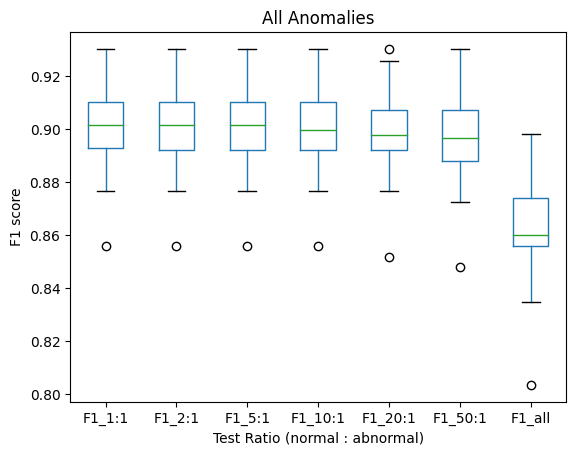

Mean
F1_1:1     0.900771
F1_2:1     0.900638
F1_5:1     0.900504
F1_10:1    0.900371
F1_20:1    0.899706
F1_50:1    0.898378
F1_all     0.861871
dtype: float64

IQR
F1_1:1     0.017161
F1_2:1     0.018162
F1_5:1     0.018162
F1_10:1    0.018162
F1_20:1    0.015150
F1_50:1    0.019142
F1_all     0.018018
dtype: float64


In [49]:
anomalies_all.filter(like='F1').boxplot(grid=False)
plt.title('All Anomalies')
plt.xlabel('Test Ratio (normal : abnormal)')
plt.ylabel('F1 score')
plt.show()

df_stat(anomalies_all)

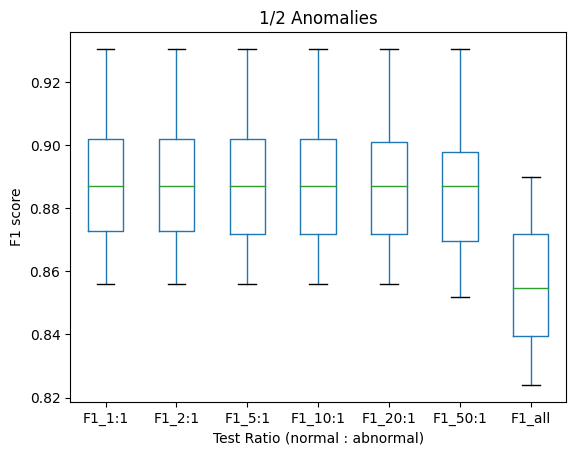

Mean
F1_1:1     0.887105
F1_2:1     0.886972
F1_5:1     0.886839
F1_10:1    0.886839
F1_20:1    0.886307
F1_50:1    0.885250
F1_all     0.856590
dtype: float64

IQR
F1_1:1     0.028938
F1_2:1     0.028938
F1_5:1     0.029934
F1_10:1    0.029934
F1_20:1    0.028932
F1_50:1    0.028304
F1_all     0.032347
dtype: float64


In [50]:
anomalies_1_2.filter(like='F1').boxplot(grid=False)
plt.title('1/2 Anomalies')
plt.xlabel('Test Ratio (normal : abnormal)')
plt.ylabel('F1 score')
plt.show()

df_stat(anomalies_1_2)

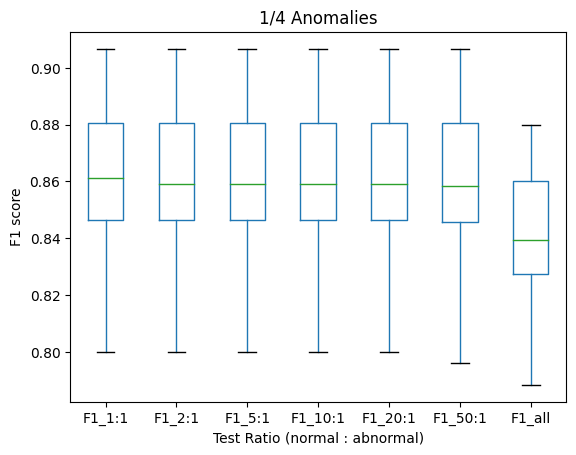

Mean
F1_1:1     0.861652
F1_2:1     0.861519
F1_5:1     0.861387
F1_10:1    0.861257
F1_20:1    0.860991
F1_50:1    0.860204
F1_all     0.840075
dtype: float64

IQR
F1_1:1     0.034122
F1_2:1     0.034122
F1_5:1     0.034122
F1_10:1    0.034122
F1_20:1    0.034122
F1_50:1    0.034757
F1_all     0.032946
dtype: float64


In [51]:
anomalies_1_4.filter(like='F1').boxplot(grid=False)
plt.title('1/4 Anomalies')
plt.xlabel('Test Ratio (normal : abnormal)')
plt.ylabel('F1 score')
plt.show()

df_stat(anomalies_1_4)

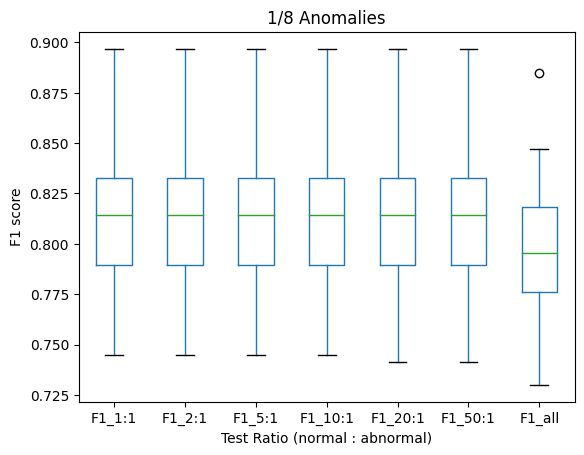

Mean
F1_1:1     0.814843
F1_2:1     0.814714
F1_5:1     0.814714
F1_10:1    0.814714
F1_20:1    0.814456
F1_50:1    0.813811
F1_all     0.798873
dtype: float64

IQR
F1_1:1     0.043073
F1_2:1     0.043073
F1_5:1     0.043073
F1_10:1    0.043073
F1_20:1    0.043073
F1_50:1    0.043073
F1_all     0.042548
dtype: float64


In [52]:
anomalies_1_8.filter(like='F1').boxplot(grid=False)
plt.title('1/8 Anomalies')
plt.xlabel('Test Ratio (normal : abnormal)')
plt.ylabel('F1 score')
plt.show()

df_stat(anomalies_1_8)

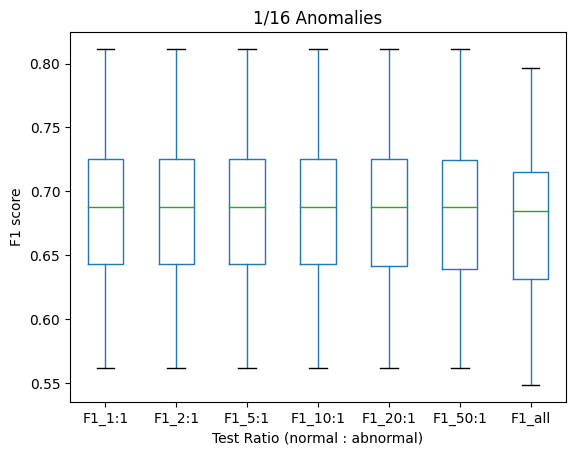

Mean
F1_1:1     0.690045
F1_2:1     0.690045
F1_5:1     0.690045
F1_10:1    0.690045
F1_20:1    0.689927
F1_50:1    0.688975
F1_all     0.680822
dtype: float64

IQR
F1_1:1     0.082638
F1_2:1     0.082638
F1_5:1     0.082638
F1_10:1    0.082638
F1_20:1    0.083523
F1_50:1    0.085230
F1_all     0.083801
dtype: float64


In [53]:
anomalies_1_16.filter(like='F1').boxplot(grid=False)
plt.title('1/16 Anomalies')
plt.xlabel('Test Ratio (normal : abnormal)')
plt.ylabel('F1 score')
plt.show()

df_stat(anomalies_1_16)

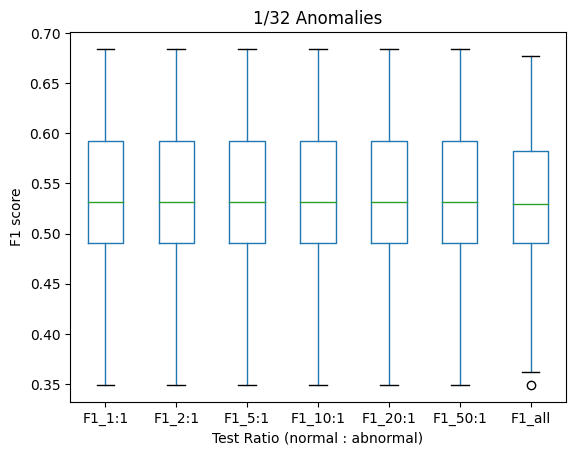

Mean
F1_1:1     0.534335
F1_2:1     0.534335
F1_5:1     0.534335
F1_10:1    0.534335
F1_20:1    0.534335
F1_50:1    0.534230
F1_all     0.529338
dtype: float64

IQR
F1_1:1     0.101468
F1_2:1     0.101468
F1_5:1     0.101468
F1_10:1    0.101468
F1_20:1    0.101468
F1_50:1    0.101468
F1_all     0.091597
dtype: float64


In [54]:
anomalies_1_32.filter(like='F1').boxplot(grid=False)
plt.title('1/32 Anomalies')
plt.xlabel('Test Ratio (normal : abnormal)')
plt.ylabel('F1 score')
plt.show()

df_stat(anomalies_1_32)

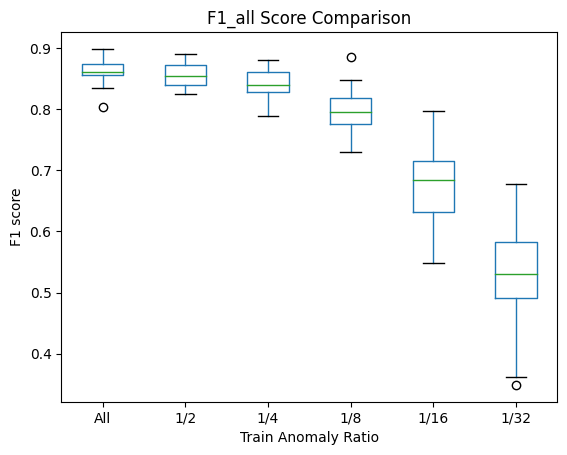

In [62]:
df_list = [anomalies_all, anomalies_1_2, anomalies_1_4, anomalies_1_8, anomalies_1_16, anomalies_1_32]
title = ['All', '1/2', '1/4', '1/8', '1/16', '1/32']

tmp = pd.DataFrame()

for i, df in enumerate(df_list):
    df = df.filter(like='F1_all').rename(columns={'F1_all': title[i]})
    tmp = pd.concat([tmp, df], axis=1)
    
tmp.boxplot(grid=False)
plt.title('F1_all Score Comparison')
plt.xlabel('Train Anomaly Ratio')
plt.ylabel('F1 score')
plt.show()

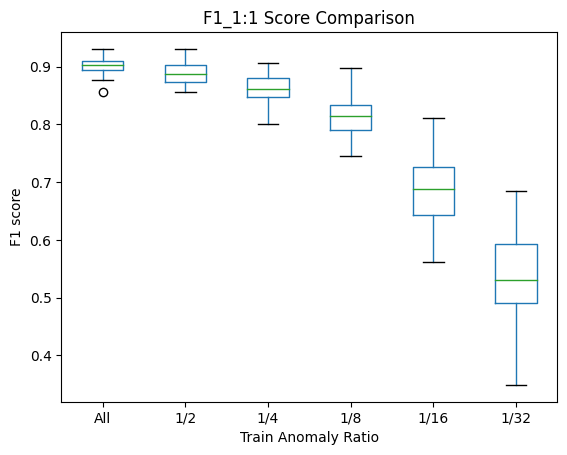

In [63]:
df_list = [anomalies_all, anomalies_1_2, anomalies_1_4, anomalies_1_8, anomalies_1_16, anomalies_1_32]
title = ['All', '1/2', '1/4', '1/8', '1/16', '1/32']

tmp = pd.DataFrame()

for i, df in enumerate(df_list):
    df = df.filter(like='F1_1:1').rename(columns={'F1_1:1': title[i]})
    tmp = pd.concat([tmp, df], axis=1)
    
tmp.boxplot(grid=False)
plt.title('F1_1:1 Score Comparison')
plt.xlabel('Train Anomaly Ratio')
plt.ylabel('F1 score')
plt.show()